# Linear Regression

คุณได้รับงานเป็นที่ปรึกษาบริษัท E-Commerce ขายเสื้อผ้าแห่งหนึ่ง  
บริษัทนี้มี **แอปมือถือ** และ **เว็บไซต์** ให้ลูกค้าซื้อเสื้อผ่าออนไลน์ แต่ก็มีหน้าร้านให้ลูกค้าได้ลองเสื้อผ้าและมีผู้ให้คำแนะนำด้านแฟชันส่วนตัว จากนั้นลูกค้าสามารถกลับบ้านและสั่งซื้อของจากทางเว็บไซต์หรือแอปมือถือก็ได้

ทางบริษัทกำลังลังเลว่าจะลงทุนกับพัฒนาเว็บไซต์หรือแอปมือถือดี
พวกเขาได้จ้างคุณมาเป็นที่ปรึกษาเพื่อตอบคำถามนี้

## Imports


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## The Data

* Avg. Session Length: เวลาเฉลี่ยที่ลูกค้าใช้ที่หน้าร้าน ในหน่วยนาที
* Time on App: เวลาเฉลี่ยที่ลูกค้าใช้ในแอปมือถือ ในหน่วยนาที
* Time on Website: เวลาเฉลี่ยที่ลูกค้าใช้ในเว็บไซต์ ในหน่วยนาที
* Length of Membership: ระยะเวลาในหน่วยปีที่ลูกค้าเป็นสมาชิก

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('Ecommerce Customers')

**ใช้ head() descibe() info() เพื่อดูข้อมูลเบื้องต้น**

In [ ]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

วิเคราะห์ข้อมูลเบื่องต้น

**วาด [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) โดยให้แกน x เป็น `Time on Website` และ y เป็น `Yearly Amount Spent`**

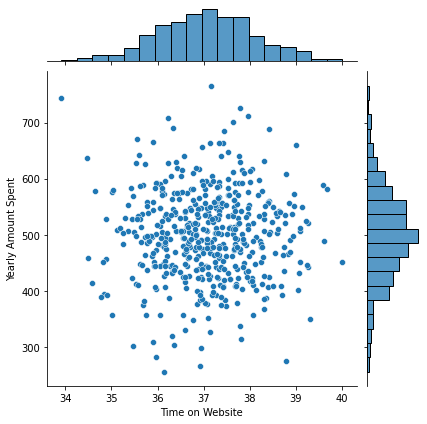

In [ ]:
sns.jointplot(data=df, x='Time on Website', y='Yearly Amount Spent')

**วาด [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) โดยให้แกน x เป็น `Time on App` และแกน y เป็น `Yearly Amount Spent`**

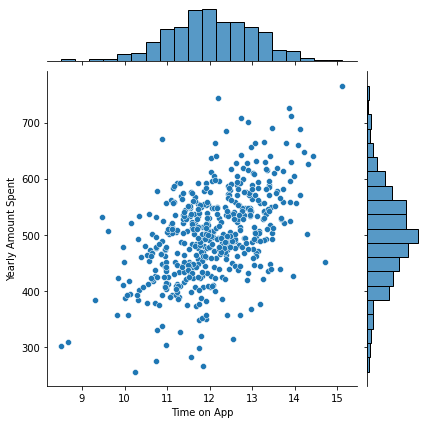

In [ ]:
sns.jointplot(data=df, x='Time on App', y='Yearly Amount Spent')

**วาด [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) โดยให้แกน x เป็น `Avg. Session Length` และแกน y เป็น `Yearly Amount Spent`**

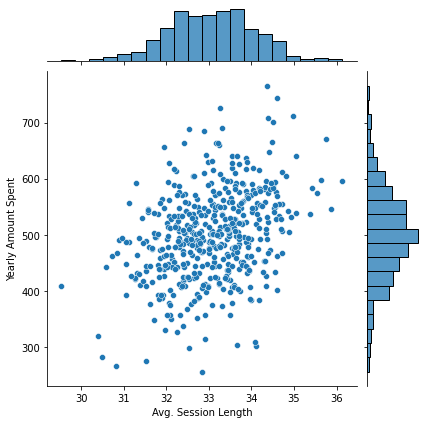

In [ ]:
sns.jointplot(data=df, x='Avg. Session Length', y='Yearly Amount Spent')

**ใช้ [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) เพื่อดูความสัมพันธ์ทุกคู่ตัวแปรใน data set** 

In [ ]:
sns.pairplot(df)

**จาก pairplot ด้านบน ฟีเจอร์ใดดูมีความสัมพันธ์กับ `Yearly amount spent` มากที่สุด**

In [ ]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


## Training and Testing Data

<!-- Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.   -->
<!-- **Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**   -->


เตรียมข้อมูลสำหรับ Linear Regression โดยให้  
- **`X` (ใช้ตัวพิมพ์ใหญ่เพื่อสื่อความหมายว่าเป็น Matrix) เป็นตัวแปรต้น  
`['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']`**

- **`y` (ใช้ตัวพิมพ์เล็กเพื่อสื่อความหมายว่าเป็น Vector) เป็นตัวแปรตาม `Yearly Amount Spent`**

In [ ]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [ ]:
y = df['Yearly Amount Spent']

<!-- **Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101** -->

**แบ่งข้อมูลเป็น 2 ชุดคือ Training Data กับ Testing Data โดยใช้คำสั่ง `train_test_split` โดยให้ `test_size=0.3` และ `random_state=101`**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**ตรวจสอบ coefficients ของโมเดล**

In [ ]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [ ]:
pd.DataFrame(lm.coef_, index=X.columns, columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data
ใช้โมเดลที่เราได้มาพยากรณ์ (predict) ผลลัพธ์

In [ ]:
# ลอง predict ข้อมูลแถวที่ index = 0
x0 = X.iloc[0]
x0

Avg. Session Length     34.497268
Time on App             12.655651
Time on Website         39.577668
Length of Membership     4.082621
Name: 0, dtype: float64

In [ ]:
y0_pred = lm.predict([x0])
y0_pred

array([594.45838223])

In [ ]:
y[0]

587.9510539684005

In [ ]:
y_pred = lm.predict(X_test)
y_pred.shape

(150,)

**วาด scatterplot เพื่อเปรียบเทียบ y_test และ y_pred**

Text(0, 0.5, 'Y Predicted')

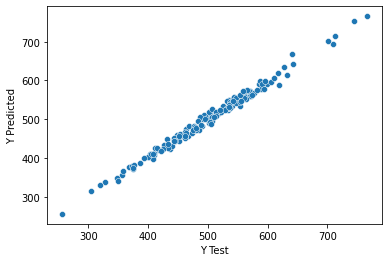

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

## Evaluating the Model
ประเมินความถูกต้องของโมเดล

**คำนวณค่า**
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [ ]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')

Mean Absolute Error: 7.228148653430845
Mean Square Error: 79.81305165097463
Root Mean Square Error : 8.933815066978644


In [ ]:
y.describe()

count    500.000000
mean     499.314038
std       79.314782
min      256.670582
25%      445.038277
50%      498.887875
75%      549.313828
max      765.518462
Name: Yearly Amount Spent, dtype: float64

In [ ]:
metrics.r2_score(y_test, y_pred)

0.9890046246741234

## Residuals

In [ ]:
res = y_test - y_pred
res.describe()

count    150.000000
mean      -0.725432
std        8.934144
min      -26.955731
25%       -6.971724
50%       -1.424168
75%        5.398126
max       29.998572
Name: Yearly Amount Spent, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


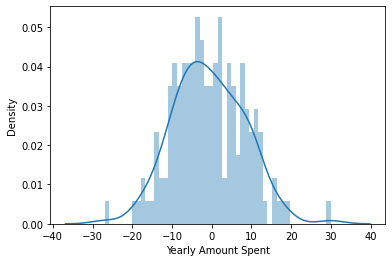

In [ ]:
sns.distplot(res, bins=50)

## Conclusion

In [ ]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Coefficients ด้านบนมีความหมายว่าอย่างไร**

*Answer here*

**คุณคิดว่าทางบริษัทควรลงทุนกับการพัฒนา แอปมือถือ หรือ เว็บไซต์ดี?**

In [ ]:
df['Time on Website'].describe()

count    500.000000
mean      37.060445
std        1.010489
min       33.913847
25%       36.349257
50%       37.069367
75%       37.716432
max       40.005182
Name: Time on Website, dtype: float64

In [ ]:
df['Time on App'].describe()

count    500.000000
mean      12.052488
std        0.994216
min        8.508152
25%       11.388153
50%       11.983231
75%       12.753850
max       15.126994
Name: Time on App, dtype: float64

*Answer here*

## Great Job!